# ANN for Graduate Admission 
### (Mean Squared Error)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/Unstopable18/Datasets/main/Graduate_Admission.csv')

In [23]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [25]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

In [26]:
print('GRE Score\nMin -> ',df['GRE Score'].min(),'\nMax -> ',df['GRE Score'].max())

GRE Score
Min ->  290 
Max ->  340


In [27]:
print('TOEFL Score\nMin -> ',df['TOEFL Score'].min(),'\nMax -> ',df['TOEFL Score'].max())

TOEFL Score
Min ->  92 
Max ->  120


In [28]:
df.duplicated().sum()

0

In [29]:
X=df.iloc[:,0:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [30]:
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
X_train.shape

(400, 7)

In [33]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [40]:
history=model.fit(X_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 0s 31ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 2/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 3/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 5/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 6/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 8/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 9/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 10/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0053 - val_loss: 0.0054

In [41]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [42]:
r2_score(y_test,y_pred)

0.8098546199527275

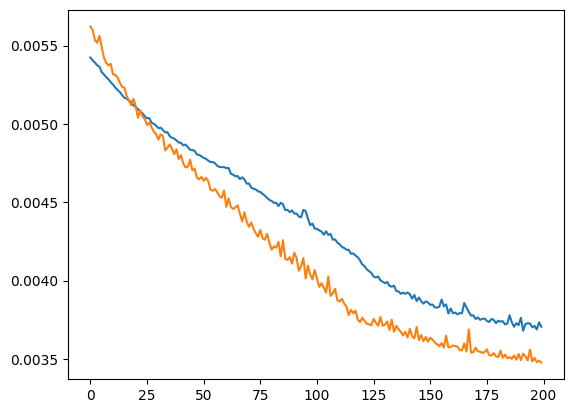

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])